In [ ]:
import os
import pandas as pd
import soundfile as sf 
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
VERBO = '/content/drive/MyDrive/VERBO_OK/'
dir_list = os.listdir(VERBO)
dir_list.pop(3)

'features'

In [ ]:
emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(VERBO + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(part[0])
        temp = part[1]
        if temp == "f1" or temp =='f2' or temp == 'f3' or temp == 'f4' or temp == 'f5' or temp == 'f6':
            temp = "feminino"
        else:
            temp = "masculino"
        gender.append(temp)
        path.append(VERBO + i + '/' + f)

        
VERBO_df = pd.DataFrame(emotion)
VERBO_df = VERBO_df.replace({'neu':0, 'des':1, 'ale':2, 'tri':3, 'rai':4, 'med':5, 'sur':6})
VERBO_df = pd.concat([pd.DataFrame(gender),VERBO_df],axis=1)
VERBO_df.columns = ['gender','emotion']
#VERBO_df['labels'] = VERBO_df.gender + '_' + VERBO_df.emotion
VERBO_df['source'] = 'VERBO'  
VERBO_df = pd.concat([VERBO_df,pd.DataFrame(path, columns = ['path'])],axis=1)
#VERBO_df = VERBO_df.drop(['gender', 'emotion'], axis=1)
#VERBO_df.labels.value_counts()
VERBO_df.head(20)

,gender,emotion,source,path
0,feminino,1,VERBO,/content/drive/MyDrive/VERBO_OK/f3/des-f3-l1.wav
1,feminino,5,VERBO,/content/drive/MyDrive/VERBO_OK/f3/med-f3-l1.wav
2,feminino,0,VERBO,/content/drive/MyDrive/VERBO_OK/f3/neu-f3-ns4.wav
3,feminino,2,VERBO,/content/drive/MyDrive/VERBO_OK/f3/ale-f3-ns2.wav
4,feminino,2,VERBO,/content/drive/MyDrive/VERBO_OK/f3/ale-f3-ns1.wav
5,feminino,2,VERBO,/content/drive/MyDrive/VERBO_OK/f3/ale-f3-s2.wav
6,feminino,5,VERBO,/content/drive/MyDrive/VERBO_OK/f3/med-f3-s2.wav
7,feminino,5,VERBO,/content/drive/MyDrive/VERBO_OK/f3/med-f3-s1.wav
8,feminino,1,VERBO,/content/drive/MyDrive/VERBO_OK/f3/des-f3-s1.wav
9,feminino,0,VERBO,/content/drive/MyDrive/VERBO_OK/f3/neu-f3-ns3.wav


In [ ]:
def audio_features_MFCC(file_title):
    with sf.SoundFile(file_title) as audio_recording:
        audio = audio_recording.read(dtype="float32")
        sample_rate = audio_recording.samplerate 
        result=np.array([])       
        mfccs=np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))    
    return result

In [ ]:
def loading_audio_data():
    qtd = len(VERBO_df.path)
    x = []
    y = []

    for i in range(qtd):                       
        emotion = VERBO_df.emotion[i]
        path = VERBO_df.path[i]
        feature = audio_features_MFCC(path)
        #feature = audio_features_Chroma(path)
        #feature = audio_features_Mel(path)
        
        x.append(feature)   
        y.append(emotion)

    return {"X":x,"y":y}

In [ ]:
import time
start_time = time.time()

dic_mfcc = loading_audio_data()

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 241.47580432891846 seconds ---


In [ ]:
X = pd.DataFrame(dic_mfcc["X"])
y = pd.DataFrame(dic_mfcc["y"])

In [ ]:
data = pd.concat([X, y], axis =1)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0
0,-299.244476,134.937912,-38.547646,32.485504,3.204261,-26.618738,14.904951,-7.597967,-9.162752,4.662045,-11.622400,-3.855593,-6.554804,-13.773700,-2.608310,-7.527237,-4.670477,0.697392,-9.785432,-4.865035,-2.856929,-9.714797,-2.941893,-4.022176,-7.476486,-1.894922,-4.093746,-2.224765,2.169287,0.460872,6.342788,7.944646,4.955812,7.856286,4.108639,2.609336,4.280911,0.224271,3.728909,5.090572,1
1,-280.755219,126.081894,-41.298115,38.425438,0.828395,-24.939224,19.244261,-11.226633,-9.258340,3.081147,-17.815662,-2.693212,-3.222776,-11.625367,0.875252,-8.848180,-7.264411,1.203914,-10.972466,-5.013815,-2.063886,-11.895419,-3.339726,-3.934288,-8.959902,-2.532706,-8.313913,-6.119390,3.669958,1.787428,8.762587,11.925750,7.551251,9.200706,2.482389,2.761377,7.229163,0.452960,4.331350,5.395949,5
2,-289.371674,163.568909,-42.457962,31.825321,9.872895,-18.090706,15.875987,-11.537040,-8.125425,0.530380,-17.792027,-1.966992,-2.961759,-7.976524,0.711579,-12.484450,-5.248092,2.978511,-13.843119,-5.348973,0.686069,-11.644198,-6.281087,-5.437551,-8.937038,-3.735828,-6.220537,-1.735462,0.900201,-7.883902,-2.561250,-0.950544,-4.833997,2.501456,0.179654,-0.101232,7.432496,6.438443,9.989048,10.347374,0
3,-289.829590,122.062752,-47.390533,30.187838,6.926980,-19.324974,8.132305,-19.527636,-6.840974,3.717316,-18.629246,-3.734191,-7.389874,-12.683773,2.828109,-10.750315,-9.235787,3.774590,-8.282649,-4.805080,1.280329,-5.235325,-0.304205,-1.263289,-4.907875,-0.458500,-0.603904,4.436168,6.061274,1.145645,5.863343,1.454023,-3.912467,3.030716,-1.044044,-2.317915,3.152509,-0.738592,1.187798,4.010984,2
4,-253.765579,157.213974,-55.141525,26.518539,2.841007,-21.679552,12.843037,-16.090603,-3.021253,7.149221,-14.612515,0.835789,-5.195010,-9.742453,2.814099,-11.553067,-6.538216,1.238463,-11.794512,-4.088756,-1.457239,-7.344140,0.964859,-1.949142,-3.119444,4.733239,-0.046918,0.064440,1.419936,-4.135865,1.099942,1.722127,-0.706707,5.784656,4.278145,4.550119,6.335617,0.084374,0.971715,-0.456071,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,-183.381912,104.789337,14.807039,-9.672712,-6.459239,22.275301,-15.362299,-3.511589,-6.818185,-2.652336,-14.710246,2.959188,-12.360679,-2.521060,-3.964326,7.648031,-7.394562,7.435741,-10.081418,0.600119,-5.337340,1.549539,-9.154539,2.787532,-12.210612,-2.672940,-6.649271,2.951764,-8.714530,3.518996,-7.182069,0.295285,-5.939539,0.105416,-7.892310,-0.272436,-9.534084,-2.516351,-10.488039,0.082739,4
1161,-168.763092,69.961540,4.856296,6.709993,-4.954771,16.218691,-21.581753,-17.088322,-15.802592,0.064830,-20.791382,-7.436071,-10.392581,-0.421666,-17.951622,-0.481544,-8.983899,0.946325,-14.862037,-2.153126,-10.337239,-2.237139,-10.764190,6.132142,-8.123683,5.164895,-2.219543,12.866432,1.128578,12.086308,1.105813,11.755951,-0.267902,7.042945,0.667894,8.061094,-1.496503,5.407216,-4.816868,3.877920,6
1162,-197.754654,57.595177,11.844243,15.256923,-3.609420,17.730558,-17.815870,-18.759687,-14.951108,1.754533,-21.413151,-8.789320,-14.282114,0.353392,-17.766882,-7.510611,-12.317961,0.619248,-12.611516,-2.820594,-10.624775,-0.985336,-5.822318,8.755358,-6.255806,11.334776,1.253069,11.042601,-2.753516,9.436544,-3.689944,5.533223,-4.322696,6.429312,-1.420542,4.590117,-3.639744,3.307014,-3.927598,2.898216,6
1163,-181.388840,85.465805,1.650203,4.989377,9.457479,18.850460,-8.209545,7.544348,-22.032797,1.836285,-23.831577,-5.945150,-15.134949,-4.104238,-14.195700,2.097072,-11.605044,1.109447,-10.540604,-0.574141,-5.950006,-0.305174,-9.543948,2.005487,-9.505818,0.946055,-11.221388,-4.524084,-9.079027,-5.145490,-14.498576,-3.387048,-10.812784,-2.691946,-11.365395,-3.237841,-5.289690,2.339355,0.057275,11.052513,5


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape, x_testcnn.shape

((932, 40, 1), (233, 40, 1))

In [ ]:
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)



In [ ]:

import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(64, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(32, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_8 (Activation)    (None, 40, 128)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 10, 64)            41024     
_________________________________________________________________
activation_9 (Activation)    (None, 10, 64)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 64)           

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
59/59 [==============================] - 3s 18ms/step - loss: 4.5048 - accuracy: 0.1566 - val_loss: 2.0619 - val_accuracy: 0.2318
Epoch 2/200
59/59 [==============================] - 1s 8ms/step - loss: 2.9289 - accuracy: 0.1389 - val_loss: 1.8812 - val_accuracy: 0.2361
Epoch 3/200
59/59 [==============================] - 1s 9ms/step - loss: 2.3427 - accuracy: 0.1774 - val_loss: 1.7779 - val_accuracy: 0.2704
Epoch 4/200
59/59 [==============================] - 1s 9ms/step - loss: 2.2785 - accuracy: 0.1600 - val_loss: 1.7087 - val_accuracy: 0.3433
Epoch 5/200
59/59 [==============================] - 1s 9ms/step - loss: 2.0653 - accuracy: 0.2217 - val_loss: 1.6996 - val_accuracy: 0.3047
Epoch 6/200
59/59 [==============================] - 0s 8ms/step - loss: 1.9354 - accuracy: 0.2355 - val_loss: 1.7026 - val_accuracy: 0.3090
Epoch 7/200
59/59 [==============================] - 1s 9ms/step - loss: 1.9220 - accuracy: 0.2845 - val_loss: 1.6886 - val_accuracy: 0.3348
Epoch 8/200


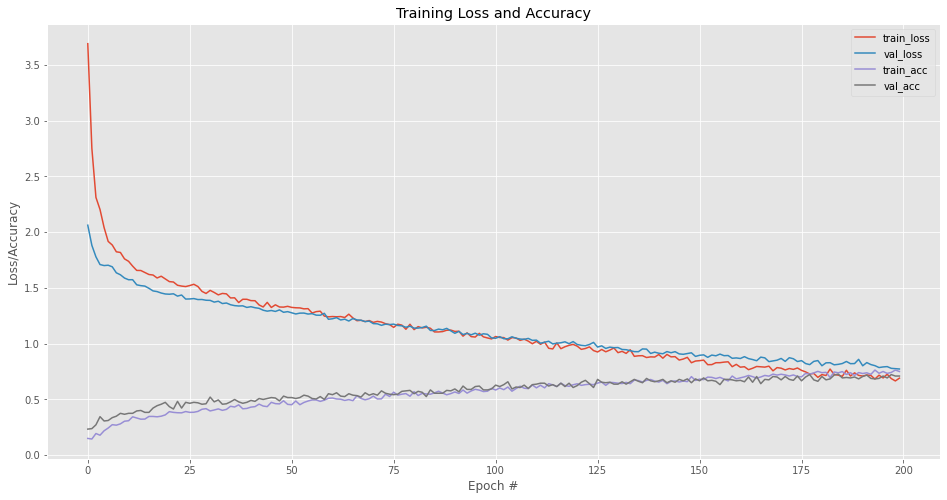

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(16,8))
plt.plot(cnnhistory.history["loss"], label="train_loss")
plt.plot(cnnhistory.history["val_loss"], label="val_loss")
plt.plot( cnnhistory.history["accuracy"], label="train_acc")
plt.plot(cnnhistory.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig('cnn.png', bbox_inches='tight')

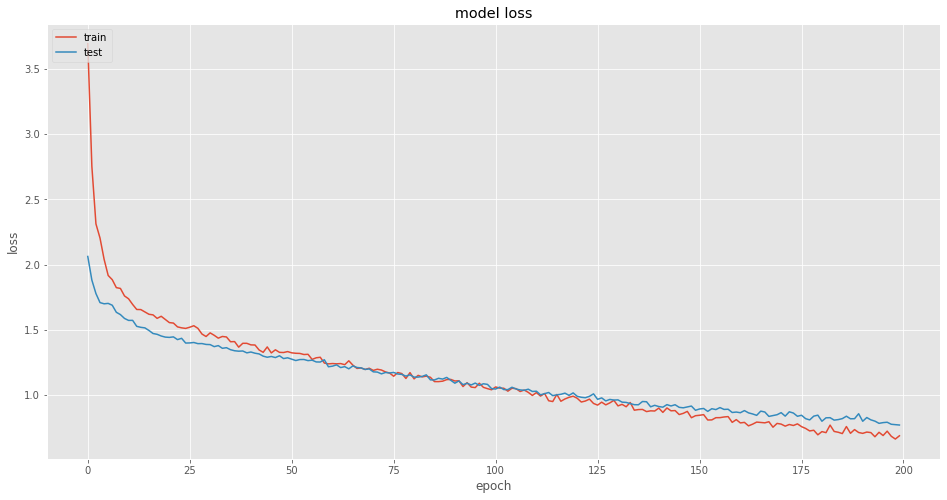

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

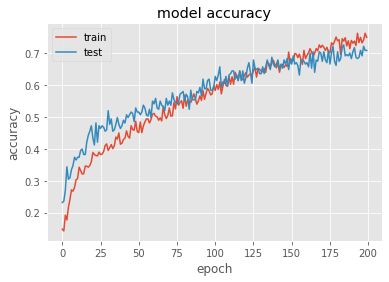

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

predictions = model.predict_classes(x_testcnn)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = np.argmax(model.predict(x_testcnn), axis=-1)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        36
           1       0.65      0.77      0.70        26
           2       0.66      0.55      0.60        38
           3       0.84      0.88      0.86        41
           4       0.71      0.71      0.71        35
           5       0.62      0.59      0.60        27
           6       0.63      0.63      0.63        30

    accuracy                           0.71       233
   macro avg       0.70      0.70      0.70       233
weighted avg       0.71      0.71      0.71       233



----accuracy score 70.81545064377683 ----


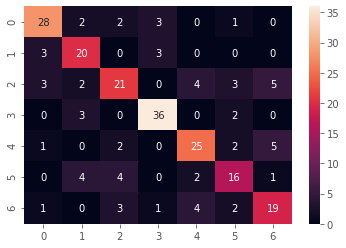

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)


cm = confusion_matrix(y_test,predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [ ]:
path_audio_1 = '/content/drive/MyDrive/VERBO_OK/f3/neu-f3-ns4.wav'
path_audio_2 = '/content/drive/MyDrive/audio_teste/tri-m6-q1.wav'
path_audio_3 = '/content/drive/MyDrive/audio_teste/tri-m6-s1.wav'
path_audio_4 = '/content/drive/MyDrive/audio_teste/caminho_nuvens_ajuste.wav'
audio_1 = audio_features_MFCC(path_audio_1)
audio_1  = audio_1.reshape(1,-1,1)
audio_2 = audio_features_MFCC(path_audio_2)
audio_2  = audio_2.reshape(1,-1,1)
audio_3 = audio_features_MFCC(path_audio_3)
audio_3  = audio_3.reshape(1,-1,1)
audio_4 = audio_features_MFCC(path_audio_4)
audio_4  = audio_4.reshape(1,-1,1)

In [ ]:
predictions = model.predict(audio_3)
lista_sentimento = ['neutro','desgosto','alegria','tristeza','raiva','medo','surpresa']
maior_taxa = np.argmax(predictions)
taxa = predictions[0][maior_taxa]
print(f"previsão de ser {lista_sentimento[maior_taxa]} com {taxa*100} % de acerto ",maior_taxa)

previsão de ser tristeza com 53.94890904426575 % de acerto  3


In [ ]:
dir_list_coringa = os.listdir('/content/drive/MyDrive/audio_teste/coringa-split/')
for x in range(7):
  path_audio = '/content/drive/MyDrive/audio_teste/coringa-split/'+dir_list_coringa[x]
  audio = audio_features_MFCC(path_audio)
  audio = audio.reshape(1,-1,1)
  predictions = model.predict(audio)
  lista_sentimento = ['neutro','desgosto','alegria','tristeza','raiva','medo','surpresa']
  maior_taxa = np.argmax(predictions)
  taxa = predictions[0][maior_taxa]
  print(f"previsão de ser {lista_sentimento[maior_taxa]} com {taxa*100} % de acerto")

previsão de ser tristeza com 98.7874448299408 % de acerto
previsão de ser tristeza com 98.50469827651978 % de acerto
previsão de ser tristeza com 99.28586483001709 % de acerto
previsão de ser tristeza com 84.81189608573914 % de acerto
previsão de ser medo com 37.31895685195923 % de acerto
previsão de ser tristeza com 92.64549016952515 % de acerto
previsão de ser tristeza com 95.33393383026123 % de acerto


In [ ]:
model.save('/content/drive/MyDrive/modelos_ml/melhor_cnn_mfcc_2.h5')
print("MODEL SAVED")

MODEL SAVED
